In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
x = np.linspace(0, 10, 100)
y = np.array(3*x**2+4*x+8)

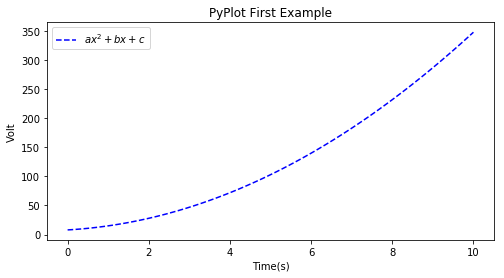

In [68]:
plt.figure(figsize=(8,4))
# plt.plot(x,y,label="$sin(x)$",color="red",linewidth=2)
# plt.scatter(x,z,label="$cos(x^2)$")
plt.plot(x,y,"b--",label="$ax^2+bx+c$")
plt.xlabel("Time(s)")
plt.ylabel("Volt")
plt.title("PyPlot First Example")
# plt.ylim(0,1.2)
plt.legend()
plt.show()

In [71]:
indices=np.arange(len(x))
np.random.shuffle(indices)
frac=0.8
XTrain=[x[i] for i in indices[:int(frac*len(x))]]
YTrain=[y[i] for i in indices[:int(frac*len(x))]]
XTest=[x[i] for i in indices[int(frac*len(x)):]]
YTest=[y[i] for i in indices[int(frac*len(x)):]]

In [79]:
#转换成向量
npX=np.array([[1,i,i**2] for i in XTrain])
npY=np.array(YTest)
npTheta=np.ones(3)

In [85]:
con=0
while(1):
    con+=1
    gradient=np.zeros(3)
    loss=0
    for i in range(len(npX)):
        print(npTheta.dot(npX[i])-npY[i])
        gradient+=(npTheta.dot(npX[i])-npY[i])*npTheta
        print(gradient·
        loss+=0.5*(npTheta.dot(npX[i])-npY[i])**2
    npTheta=npTheta-alpha*gradient
    if loss<1:
        break
    if con==100:
        break
    print(npTheta)

-230.804713805
[-230.8047138 -230.8047138 -230.8047138]
7.07407407407
[-223.73063973 -223.73063973 -223.73063973]
-6.48474645444
[-230.21538619 -230.21538619 -230.21538619]
-294.869605142
[-525.08499133 -525.08499133 -525.08499133]
35.2079379655
[-489.87705336 -489.87705336 -489.87705336]
-20.9057239057
[-510.78277727 -510.78277727 -510.78277727]
-277.24691358
[-788.02969085 -788.02969085 -788.02969085]
-239.111009081
[-1027.14069993 -1027.14069993 -1027.14069993]
-0.834302622181
[-1027.97500255 -1027.97500255 -1027.97500255]
-129.721150903
[-1157.69615345 -1157.69615345 -1157.69615345]
1.86848280788
[-1155.82767065 -1155.82767065 -1155.82767065]
-233.760534639
[-1389.58820529 -1389.58820529 -1389.58820529]
-238.073359861
[-1627.66156515 -1627.66156515 -1627.66156515]
-9.69258238955
[-1637.35414754 -1637.35414754 -1637.35414754]
-0.145597388022
[-1637.49974492 -1637.49974492 -1637.49974492]
-196.213345577
[-1833.7130905 -1833.7130905 -1833.7130905]
-15.0165289256
[-1848.72961943 -1848.

IndexError: index 20 is out of bounds for axis 0 with size 20

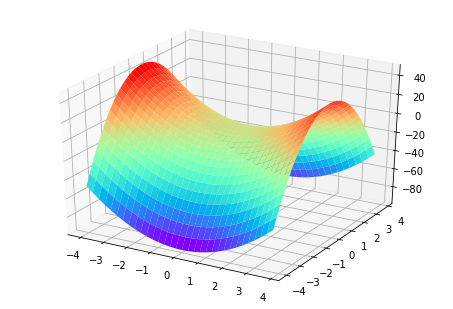

In [157]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.array(3*X**2 - 6*Y**2)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')

plt.show()

In [14]:
plota = np.arange(-4, 4, 0.25)
plotb = np.arange(-4, 4, 0.25)
plota, plotb = np.meshgrid(plota, plotb)

In [208]:
from itertools import combinations
train=list(combinations([0.01*i for i in range(100)], 2))
print(np.shape(train))
label=[]
for i in train:
    label.append(2*i[0]**2 -1*i[1]**2)

(4950L, 2L)


In [209]:
def PlotJ(train,label,a,b):
    J=np.zeros(np.shape(a))
    for ind,i in enumerate(train):
        Z_pre=np.array((a*i[0]**2 + b*i[1]**2))
        Z=label[ind]
        J+=(Z_pre-Z)**2
    return J/len(train)

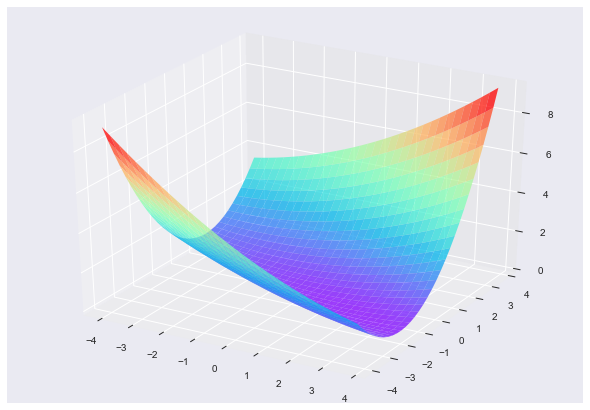

In [210]:
plotJ=PlotJ(train,label,plota,plotb)
from mpl_toolkits.mplot3d import Axes3D
plt.clf()
fig = plt.figure()
ax = Axes3D(fig)

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(plota, plotb, plotJ, rstride=1, cstride=1, cmap='rainbow',alpha=0.75)
plt.show()

In [211]:
def dJ(train,a,b):
    tmp=a*train[0]**2+b*train[1]**2-(2*train[0]**2-train[1]**2)
    djda=tmp*train[0]**2
    djdb=tmp*train[1]**2
    return djda,djdb

In [212]:
def J(train,label,a,b):

    Z_pre=np.array((a*train[0]**2 + b*train[1]**2))
    Z =label
    J =(Z_pre-Z)**2
    return J

In [213]:
import time
import os
from functools import wraps  
def exeTime(func):
    def newFunc(*args, **args2):
        t0 = time.time()
        print "@%s, {%s} start" % (time.strftime("%X", time.localtime()), func.__name__)
        back = func(*args, **args2)
        print "@%s, {%s} end" % (time.strftime("%X", time.localtime()), func.__name__)
        print "@%.3fs taken for {%s}" % (time.time() - t0, func.__name__)
        return back
    return newFunc

In [386]:
# Batch gradient descent
@exeTime
def Batch_gradient_descent(train,label,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100
    pre_b=100
    alpha=1
    iteration=0

    x=[]
    y=[]
    z=[]

    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        J_val=0
        djda=0
        djdb=0
        for ind,i in enumerate(train):
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1
            djdb+=tmp2
        djda=djda/len(train)
        djdb=djdb/len(train)
        # 记录每一步的位置
        x.append(a)
        y.append(b)
        z.append(J_val/len(train))
        # 记录上一步的位置，用于判断迭代终止
        pre_a=a
        pre_b=b

        # 梯度下降
        a-=alpha*djda
        b-=alpha*djdb
    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z


In [387]:
x,y,z=Batch_gradient_descent(train,label,tolerance=1e-5)

@9:04:45, {Batch_gradient_descent} start
a: 2.00107253455
b: -1.00038070203
iteration: 203
@9:04:49, {Batch_gradient_descent} end
@4.132s taken for {Batch_gradient_descent}


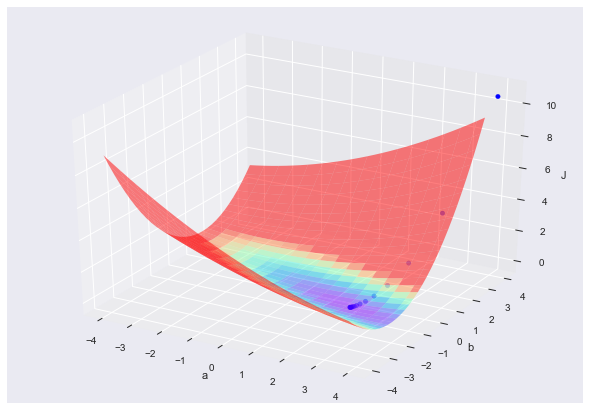

In [385]:
import scipy.io as sio
import seaborn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=1, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

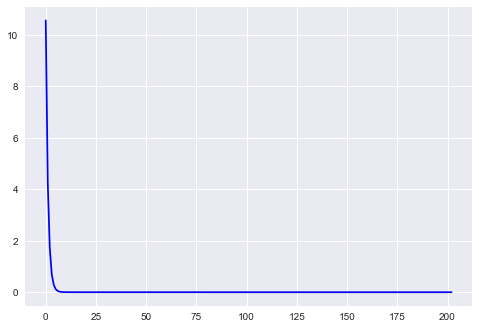

In [263]:
fig = plt.figure()

plt.plot(z,c='b')
plt.show()

In [267]:
# Batch gradient descent
@exeTime
def Stochastic_gradient_descent(train,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100;pre_b=100
    alpha=1;iteration=0
    x=[]; y=[]; z=[]
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        for ind,i in enumerate(train):
            J_val=J(i,label[ind],a,b)
            djda,djdb=dJ(i,a,b)

            # 记录上一步的位置，用于判断迭代终止
            pre_a=a
            pre_b=b

            # 梯度下降
            a-=alpha*djda
            b-=alpha*djdb

            # 记录每一步的位置
            x.append(a)
            y.append(b)
            z.append(J_val)
    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z

In [268]:
x,y,z= Stochastic_gradient_descent(train,tolerance=1e-5)

@16:11:36, {Stochastic_gradient_descent} start
a: 2.00005323596
b: -1.00005398285
iteration: 2
@16:11:36, {Stochastic_gradient_descent} end
@0.070s taken for {Stochastic_gradient_descent}


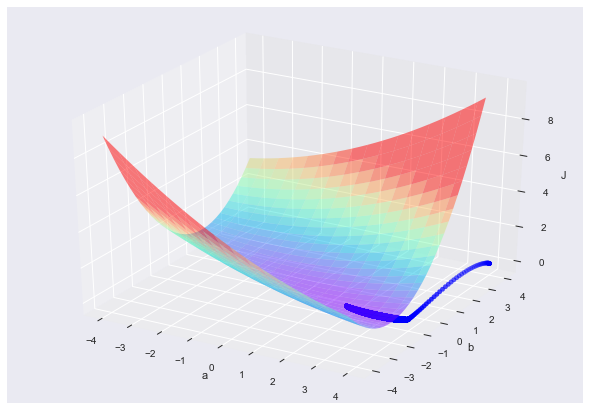

In [269]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=5, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

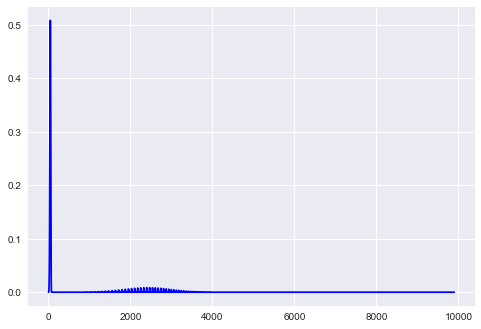

In [270]:
fig = plt.figure()

plt.plot(z,c='b')
plt.show()

In [271]:
# Mini-Batch gradient descent
@exeTime
def Mini_Batch_gradient_descent(train,batchsize=100,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100;pre_b=100
    alpha=1;iteration=0
    x=[]; y=[]; z=[]
    
    J_val=0
    djda=0
    djdb=0
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        for ind,i in enumerate(train):
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1
            djdb+=tmp2
            if ind%batchsize==0 and ind!=0:
                djda=djda/len(train)
                djdb=djdb/len(train)
                # 记录每一步的位置
                x.append(a)
                y.append(b)
                z.append(J_val/batchsize)
                
                # 记录上一步的位置，用于判断迭代终止
                pre_a=a
                pre_b=b

                # 梯度下降
                a-=alpha*djda
                b-=alpha*djdb

                J_val=0
                djda=0
                djdb=0

    print 'a:',a  
    print 'b:',b
    print 'iteration:',iteration
    return x,y,z

In [278]:
x,y,z=Mini_Batch_gradient_descent(train,batchsize=10,tolerance=1e-5)

@19:45:20, {Mini_Batch_gradient_descent} start
a: 2.01077184542
b: -1.00413746818
iteration: 135
@19:45:23, {Mini_Batch_gradient_descent} end
@2.840s taken for {Mini_Batch_gradient_descent}


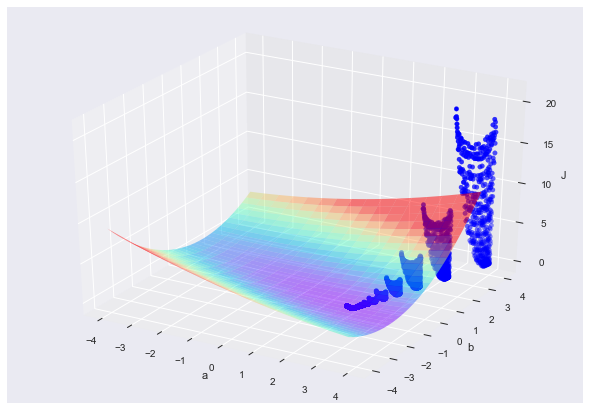

In [279]:
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=5, cmap='rainbow',alpha=0.5)


ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
ax.scatter(x,y,z,c='b')
plt.show()

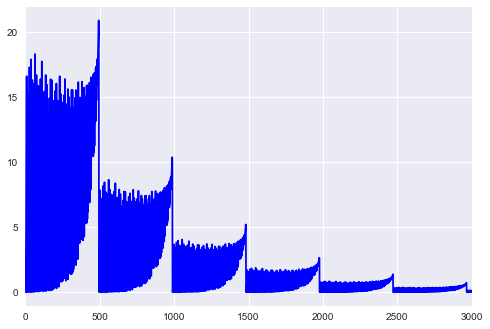

In [282]:
fig = plt.figure()

plt.plot(z,c='b')
plt.xlim(1,3000)
plt.show()

# 梯度下降
cite from 1: [机器之心](http://mp.weixin.qq.com/s?__biz=MzA3MzI4MjgzMw==&mid=2650720663&idx=3&sn=d9f671f77be23a148d1830448154a545&chksm=871b0de9b06c84ffaf260b9ba2a010108cca62d5ce3dcbd8c98c72c9f786f9cd460b27b496ca&mpshare=1&scene=2&srcid=1121mgll9exVL2Gia7trGTn7&from=timeline#wechat_redirect)
and [Sebastian Ruder's Blog](http://sebastianruder.com/#open)



梯度下降的目标是最小化以$\theta$ 为参数的目标函数（objective function）$J(\theta)$, 沿着目标函数对应参数的梯度的反方向，升级模型参数。

> Gradient descent is a way to minimize an objective function $J(\theta)$ parameterized by a model's parameters $\theta \in R^d$ by updating the parameters in the opposite direction of the gradient of the objective function to the parameters

$\theta=\theta-\eta * \frac{\partial J(\theta)}{\partial \theta}$

## 例子
### 目标和数据

根据测试集数据，求解$y=ax_1^2+bx_2^2$中a，b的数值。

测试集为键值对的形式，如$X=(1,2),y=-2$
### objective function 目标函数
若令$\theta=(a,b)$,$X=(x_1^2,x_2^2)$，则$y=\theta X$

目标函数：
$J(\theta)=\frac{1}{2}(\theta X-\hat{y})^2$

求解目标变成 $min_{\theta} \frac{1}{2}(\theta X-\hat{y})^2$

注意区分变量


In [6]:
# 生成测试数据
from itertools import combinations
import numpy as np
train=list(combinations([0.01*i for i in range(100)], 2))
label=[]
for i in train:
    label.append(2*i[0]**2 -1*i[1]**2)
print(np.shape(train))
print(train[:5])
print(label[:5])

(4950L, 2L)
[(0.0, 0.01), (0.0, 0.02), (0.0, 0.03), (0.0, 0.04), (0.0, 0.05)]
[-0.0001, -0.0004, -0.0009, -0.0016, -0.0025000000000000005]


In [7]:
# 绘制坐标
plota = np.arange(-4, 4, 0.25)
plotb = np.arange(-4, 4, 0.25)
plota, plotb = np.meshgrid(plota, plotb)

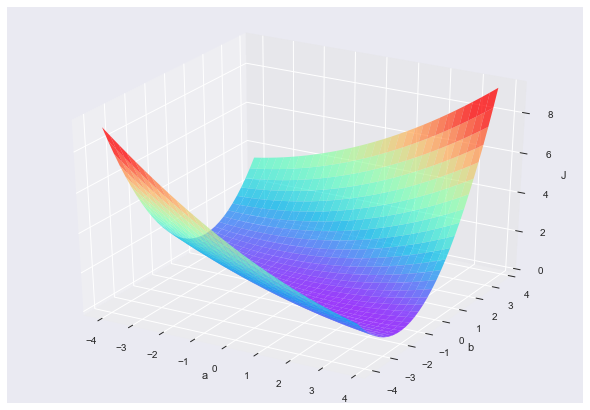

In [8]:
# 计算参数空间内，每一个坐标所对应的函数值
def PlotJ(train,label,a,b):
    J=np.zeros(np.shape(a))
    for ind,i in enumerate(train):
        Z_pre=np.array((a*i[0]**2 + b*i[1]**2))
        Z=label[ind]
        J+=(Z_pre-Z)**2
    return J/len(train)

# 绘制参数空间中，目标函数的变化值
plotJ=PlotJ(train,label,plota,plotb)

import scipy.io as sio
import seaborn
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.clf()
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zlabel('J') #坐标轴
ax.set_ylabel('b')
ax.set_xlabel('a')
# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax.plot_surface(plota, plotb, plotJ, rstride=1, cstride=1,vmax=8, cmap='rainbow',alpha=0.75)
plt.show()

# 三个变体

根据所使用的的数据量不同，梯度下降可以分为三个变体，三者对参数做更新的准确度和花费时间上面做了对应的取舍。

> Depending on the amount of data, we make a trade-off between the accuracy of the parameter update and the time it takes to perform an update.

## Batch Gradient Descent 批量梯度下降法

Calculate the gradients for __the whole dataset__ to perform just __one__ update

批量梯度下降需要对所有的数据计算梯度，只进行一次参数调整

伪码描述
```Python
for i in range(nb_epochs):
    params_grad = evaluate_gradient(loss_function, data, params)
    params = params - learning_rate * params_grad
```

特点:

* Intractable for datasets that don't fit in memory 

    > 因为需要一次性读取全部数据，所以对内存有较高要求


* Guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.
    > 优点是，对于"convex error surfaces"保证能够到达全局最小，对于"non-convex surfaces"保证能到达局部最小

* Slow
* Don't allow us to update our model __online__


In [9]:
# 定义计时函数
import time
import os
from functools import wraps  
def exeTime(func):
    def newFunc(*args, **args2):
        t0 = time.time()
        print "@%s, {%s} start" % (time.strftime("%X", time.localtime()), func.__name__)
        back = func(*args, **args2)
        print "@%s, {%s} end" % (time.strftime("%X", time.localtime()), func.__name__)
        print "@%.3fs taken for {%s}" % (time.time() - t0, func.__name__)
        return back
    return newFunc

In [10]:
# 计算目标函数的函数值和导数值
def dJ(train,a,b):
    tmp=a*train[0]**2+b*train[1]**2-(2*train[0]**2-train[1]**2)
    djda=tmp*train[0]**2
    djdb=tmp*train[1]**2
    return djda,djdb
def J(train,label,a,b):
    Z_pre=np.array((a*train[0]**2 + b*train[1]**2))
    Z =label
    J =(Z_pre-Z)**2
    return J

In [11]:
# Batch gradient descent
@exeTime
def Batch_gradient_descent(train,label,a=4,b=4,tolerance=1e-3,maxiter=1000):
    # 参数的初始化
    pre_a=100;pre_b=100;alpha=1;iteration=0
    #记录参数的变化情况
    x=[];y=[];z=[]
    # 外层迭代，每次外层迭代就完整地一次数据集
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        # 变量初始化
        iteration+=1;J_val=0;djda=0;djdb=0
        for ind,i in enumerate(train):
            # 将每个数据的计算结果相累加
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1;djdb+=tmp2
        djda=djda/len(train); djdb=djdb/len(train)
        # 记录每一步的位置
        x.append(a);y.append(b);z.append(J_val/len(train))
        # 记录上一步的位置，用于判断迭代终止
        pre_a=a;pre_b=b
        # 梯度下降
        a-=alpha*djda;b-=alpha*djdb
    print 'a:',a; print 'b:',b; print 'iteration:',iteration
    return x,y,z


In [12]:
x,y,z=Batch_gradient_descent(train,label,tolerance=1e-5,a=-3,b=4)

@10:34:58, {Batch_gradient_descent} start
a: 1.99892303117
b: -0.999617724
iteration: 335
@10:35:08, {Batch_gradient_descent} end
@9.986s taken for {Batch_gradient_descent}


In [13]:
# 绘制梯度下降路径
def PlotPath(x,y,z,plota=plota, plotb=plotb, plotJ=plotJ,zlim=None):
    plt.clf()
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(plota, plotb, plotJ,rstride=1, cstride=2,vmax=1, cmap='rainbow',alpha=0.5)
    #坐标轴
    ax.set_zlabel('J'); ax.set_ylabel('b'); ax.set_xlabel('a'); ax.scatter(x,y,z,c='b')
    if zlim:
        ax.set_zlim(0, zlim)
    plt.show()

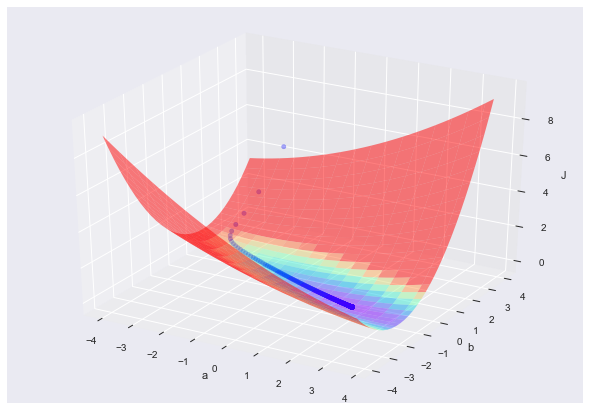

In [14]:
PlotPath(x,y,z)

In [15]:
# 误差变化曲线
def PlotErrorCurve(z,xlim=None):
    fig = plt.figure()
    plt.plot(z,c='b')
    if xlim:
        plt.xlim(0,xlim)
    plt.show()

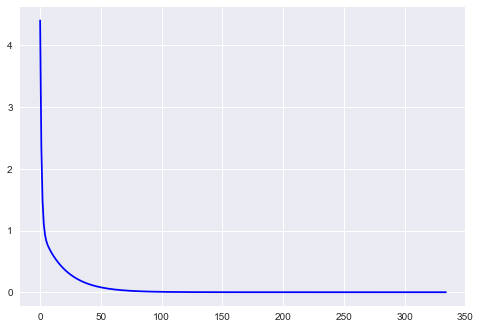

In [16]:
PlotErrorCurve(z)

## Stochastic Gradient Descent 随机梯度下降(SGD)

Stochastic gradient descent (SGD) in contrast performs a parameter update for each training example $x^{(i)}$ and label $y^{(i)}$

相比于批量梯度下降做一次参数更新要使用所有的训练集，随机梯度下降每使用一条训练数据就进行一次参数更新。

$\theta =\theta-\eta *\frac{\partial J(\theta;x^{(i)};y^{(i)})}{\partial \theta}$

伪码描述
```Python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for example in data:
    params_grad = evaluate_gradient(loss_function, example, params)
    params = params - learning_rate * params_grad
```

In [32]:
@exeTime
def Stochastic_gradient_descent(train,label,a=4,b=4,tolerance=1e-6,maxiter=1000):
    pre_a=100; pre_b=100; alpha=1; iteration=0; x=[]; y=[]; z=[]
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        index=range(len(train))
        np.random.shuffle(index)
        for ind in index:
            J_val=J(train[ind],label[ind],a,b)
            djda,djdb=dJ(train[ind],a,b)
            # 记录上一步的位置，用于判断迭代终止
            pre_a=a; pre_b=b
            # 梯度下降
            a-=alpha*djda; b-=alpha*djdb
            # 记录每一步的位置
            x.append(a); y.append(b); z.append(J_val)
    print 'a:',a; print 'b:',b; print 'iteration:',iteration
    return x,y,z

In [18]:
x,y,z= Stochastic_gradient_descent(train,label,tolerance=1e-3,a=-3,b=4)

@10:35:28, {Stochastic_gradient_descent} start
a: 2.0
b: -1.0
iteration: 1
@10:35:29, {Stochastic_gradient_descent} end
@0.052s taken for {Stochastic_gradient_descent}


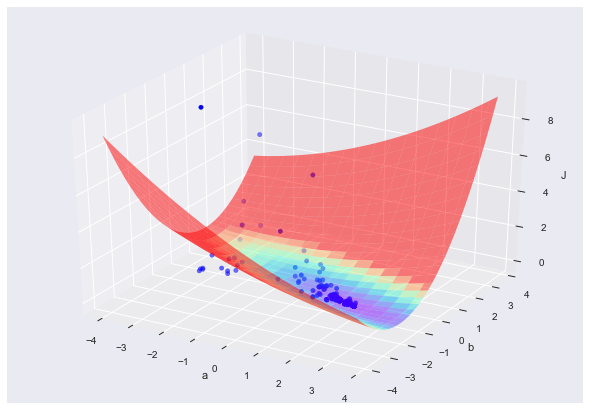

In [19]:
PlotPath(x,y,z)

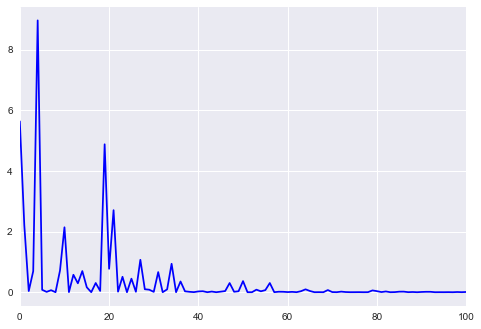

In [20]:
PlotErrorCurve(z,xlim=100)

## BGD and SGD 

当数据足够好的时候，使用SGD能够达到更快的收敛速率,方差小。

因为批量梯度下降法(BGD)在每次更新前，会对相似的样本求算梯度值，因而它在较大的数据集上的计算会有些冗余（redundant）。而随机梯度下降法通过每次更新仅对一个样本求梯度，去除了这种冗余的情况。因而，它的运行速度被大大加快，同时也能够「在线」学习。

相比批量梯度下降法的收敛会使目标函数落入一个局部极小值，SGD 收敛过程中的波动，会帮助目标函数跳入另一个可能的更小的极小值。另一方面，这最终会让收敛到特定最小值的过程复杂化，因为该方法可能持续的波动而不停止。但是，当我们慢慢降低学习率的时候，SGD 表现出了与批量梯度下降法相似的收敛过程，也就是说，对非凸函数和凸函数，必然会分别收敛到它们的极小值和最小值。

In [21]:
# 生成测试数据
from itertools import combinations
trainV=list(combinations([0.01*i for i in range(100)], 2))
labelV=[]
for i in trainV:
    labelV.append(2*i[0]**2 -1*i[1]**2+0.1*np.random.randn(1)[0])
print(np.shape(trainV))
print(trainV[:5])
print(labelV[:5])

(4950L, 2L)
[(0.0, 0.01), (0.0, 0.02), (0.0, 0.03), (0.0, 0.04), (0.0, 0.05)]
[-0.025775415144716474, 0.11754636749032657, -0.01575961552191071, 0.031782080926767368, -0.070342160409175403]


In [22]:
x,y,z= Batch_gradient_descent(trainV,labelV,tolerance=1e-6,a=-3,b=4)

@10:35:34, {Batch_gradient_descent} start
a: 1.99989395151
b: -0.999962357506
iteration: 425
@10:35:46, {Batch_gradient_descent} end
@11.647s taken for {Batch_gradient_descent}


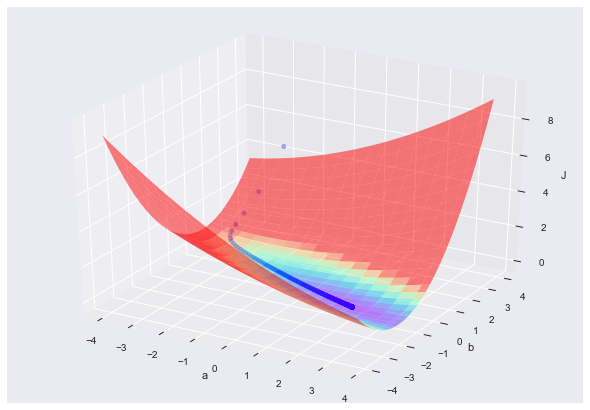

In [23]:
PlotPath(x,y,z)

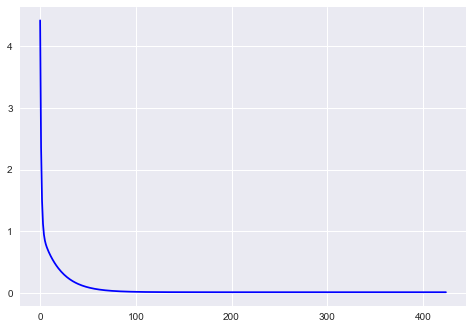

In [24]:
PlotErrorCurve(z)

In [25]:
x,y,z= Stochastic_gradient_descent(trainV,labelV,tolerance=1e-6,a=-3,b=4)

@10:36:10, {Stochastic_gradient_descent} start
a: 2.0
b: -1.0
iteration: 1
@10:36:10, {Stochastic_gradient_descent} end
@0.052s taken for {Stochastic_gradient_descent}


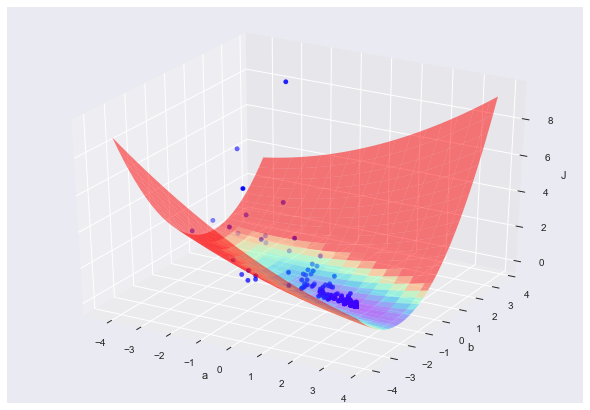

In [26]:
PlotPath(x,y,z)

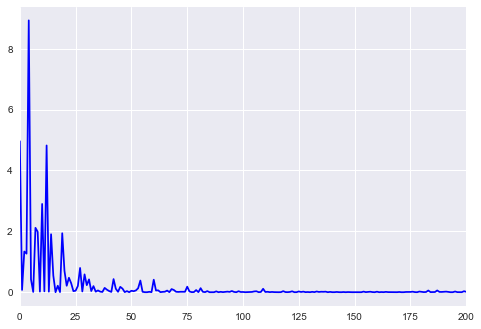

In [27]:
PlotErrorCurve(z,xlim=200)

## Mini-Batch Gradient Descent 小批量梯度下降法

小批量梯度下降法集合了上述两种方法的优势，在每次更新中，对 n 个样本构成的一批数据，计算罚函数 J(θ)，并对相应的参数求导：

$\theta =\theta-\eta *\frac{\partial J(\theta;x^{(i:i+n)};y^{(i:i+n)})}{\partial \theta}$

这种方法:

* 降低了更新参数的方差（variance），使得收敛过程更为稳定；

* 能够利用最新的深度学习程序库中高度优化的矩阵运算器，能够高效地求出每小批数据的梯度。

通常一小批数据含有的样本数量在 50 至 256 之间，但对于不同的用途也会有所变化。


In [33]:
# Mini-Batch gradient descent
@exeTime
def Mini_Batch_gradient_descent(train,label,batchsize=100,a=4,b=4,tolerance=1e-3,maxiter=1000):
    pre_a=100; pre_b=100; alpha=1; iteration=0
    x=[]; y=[]; z=[]; J_val=0; djda=0; djdb=0
    while(((abs(a-pre_a)>tolerance) and abs(b-pre_b)>tolerance) and iteration<maxiter):
        iteration+=1
        for ind,i in enumerate(train):
            J_val+=J(i,label[ind],a,b)
            tmp1,tmp2=dJ(i,a,b)
            djda+=tmp1; djdb+=tmp2
            if ind%batchsize==0 and ind!=0:
                djda=djda/len(train); djdb=djdb/len(train)
                # 记录每一步的位置
                x.append(a); y.append(b); z.append(J_val/batchsize)
                # 记录上一步的位置，用于判断迭代终止
                pre_a=a; pre_b=b
                # 梯度下降
                a-=alpha*djda; b-=alpha*djdb
                J_val=0; djda=0; djdb=0
    print 'a:',a; print 'b:',b; print 'iteration:',iteration
    return x,y,z

In [29]:
x,y,z=Mini_Batch_gradient_descent(train,label,batchsize=10,tolerance=1e-5)

@10:36:17, {Mini_Batch_gradient_descent} start
a: 2.01077184542
b: -1.00413746818
iteration: 135
@10:36:21, {Mini_Batch_gradient_descent} end
@3.942s taken for {Mini_Batch_gradient_descent}


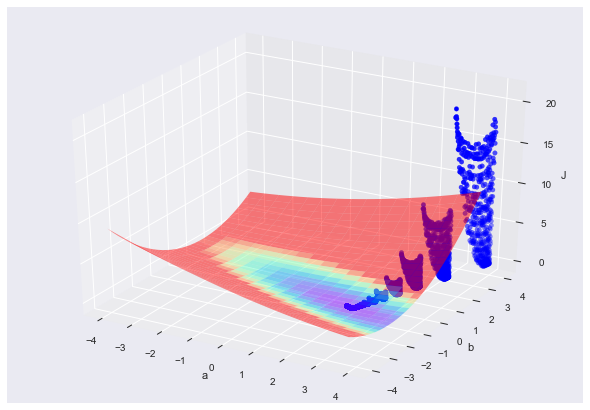

In [30]:
PlotPath(x,y,z)

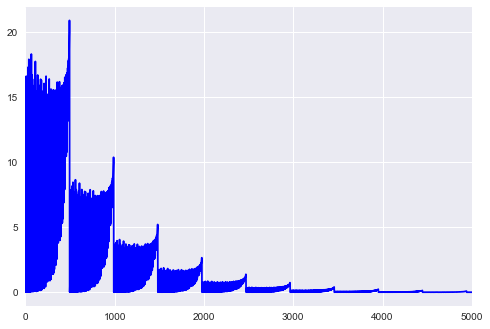

In [31]:
PlotErrorCurve(z,xlim=5000)

## 问题及挑战
mini-batch gradient descent 无法保证好的收敛性，并且留下了一些挑战：

* 选择适当的学习率是一个难题。太小的学习率会导致较慢的收敛速度，而太大的学习率则会阻碍收敛，并会引起罚函数在最小值处震荡，甚至有可能导致结果发散。

* 调整学习率的两种方法：1.我们可以设置一个关于学习率的列表，通过如退火的方法，在学习过程中不断调整学习率；2. 当每次迭代中目标函数的变化小于一定阈值时来降低学习率。但这些列表或阈值，需要根据数据集的特性，被提前定义。

* 此外，我们对所有的参数都采用了相同的学习率。但如果我们的数据比较稀疏，同时特征有着不同的出现频率，那么我们不希望以相同的学习率来更新这些变量，我们希望对较少出现的特征有更大的学习率。

* 在对神经网络最优化高度非凸的惩罚函数时，另一个通常面临的挑战，是如何避免目标函数被困在无数的局部最小值中，以导致的未完全优化的情况。Dauphin 及其他人 [19] 认为，这个困难并不来自于局部最小值，而是来自于「鞍点」，也就是在一个方向上斜率是正的、在一个方向上斜率是负的点。这些鞍点通常处于函数值相同的平面上，鞍点附近各个方向的梯度值都接近于0，所以 SGD 很难从这些鞍点中逃离。

# 梯度下降的优化算法
我们不会讨论那些不能应用于高维数据集的方法，例如牛顿法等针对二阶问题的方法。
## Momentum 动量法
SGD 很难在陡谷——一种在一个方向的弯曲程度远大于其他方向的表面弯曲情况——中找到正确更新方向。而这种陡谷，经常在局部极值中出现。在这种情况下，如下图所示，SGD 在陡谷的周围震荡，向局部极值处缓慢地前进。
![without_momentum](http://sebastianruder.com/content/images/2015/12/without_momentum.gif)